In [11]:
from collections import Counter
from pathlib import Path
from scipy.io import loadmat
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import librosa
import librosa.display

data_path = Path('./data')

# load mat files
test = loadmat(data_path / 'test.mat')['data']
training_labels = loadmat(data_path / 'training_labels.mat')['data']
training = loadmat(data_path / 'training.mat')['data']

In [12]:
print('test shape:', test.shape)
print('training_labels shape:', training_labels.shape)
print('training shape:', training.shape)
#print('training_labels:', Counter(training_labels[0, :]))

test shape: (5347, 32, 96)
training_labels shape: (1, 52890)
training shape: (52890, 32, 96)


In [13]:
data_by_label = {0: [], 1: [], 2: [], 3: [], 4: []}

for i, label in enumerate(training_labels[0]):
    data_by_label[label].append(training[i])

label_0_data = np.array(data_by_label[0])
label_1_data = np.array(data_by_label[1])
label_2_data = np.array(data_by_label[2])
label_3_data = np.array(data_by_label[3])
label_4_data = np.array(data_by_label[4])

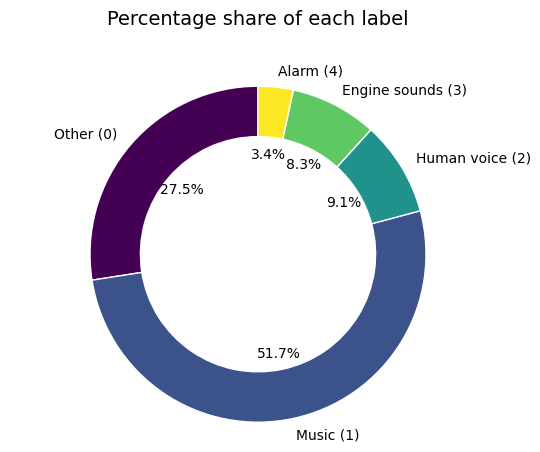

In [14]:
label_counts = [len(label_0_data), len(label_1_data), len(label_2_data), len(label_3_data), len(label_4_data)]
labels = ['Other (0)', 'Music (1)', 'Human voice (2)','Engine sounds (3)','Alarm (4)']
viridis = cm.get_cmap('viridis')
colors = [viridis(0.0), viridis(0.25), viridis(0.5), viridis(0.75), viridis(1.0)]

fig, ax = plt.subplots()
wedges, texts, autotexts = ax.pie(label_counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90,
                                  wedgeprops=dict(width=0.3, edgecolor='w'))
ax.axis('equal')
plt.setp(autotexts, size=10, color='k')
plt.setp(texts, size=10)
plt.title('Percentage share of each label', fontsize=14, y=1.1)
plt.show()

In [15]:
data_by_label = {0: [], 1: [], 2: [], 3: [], 4: []}

for i, label in enumerate(training_labels[0]):
    data_by_label[label].append(training[i])

label_0_data = np.array(data_by_label[0])
label_1_data = np.array(data_by_label[1])
label_2_data = np.array(data_by_label[2])
label_3_data = np.array(data_by_label[3])
label_4_data = np.array(data_by_label[4])

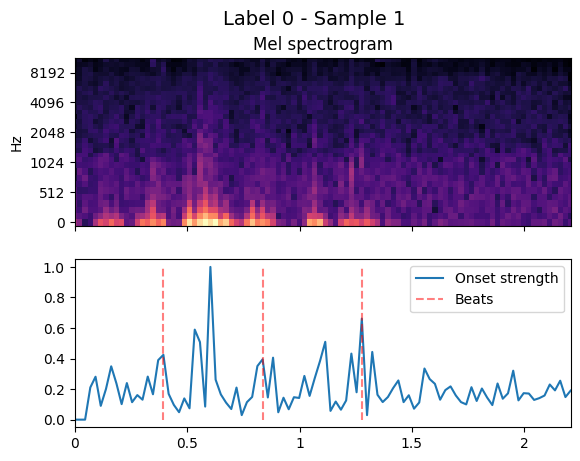

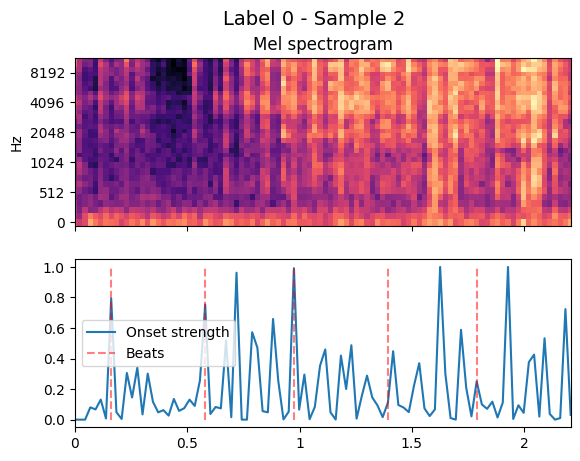

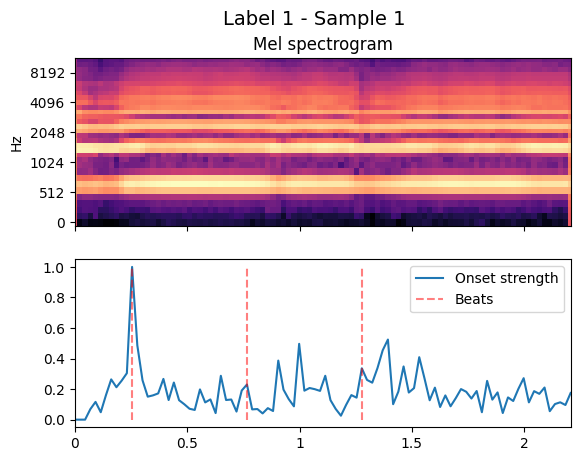

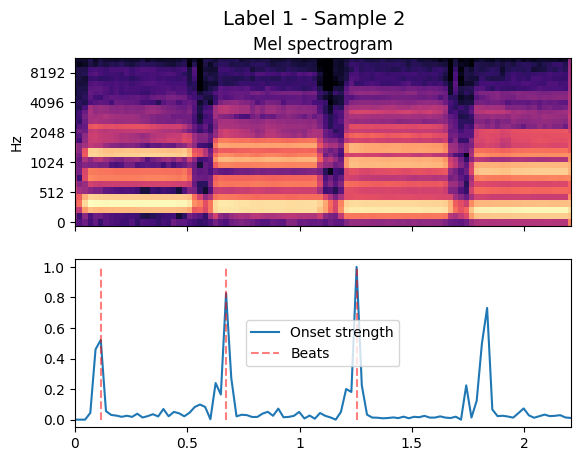

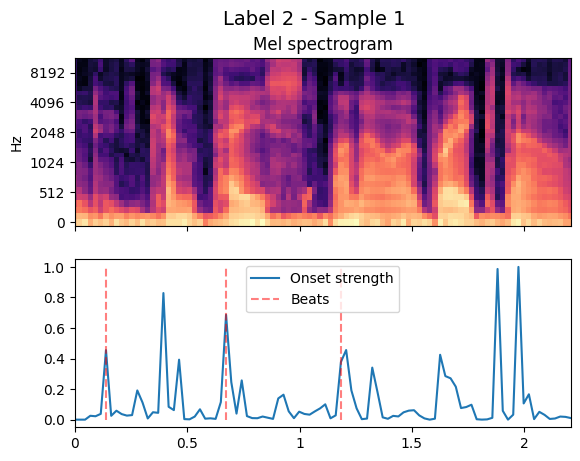

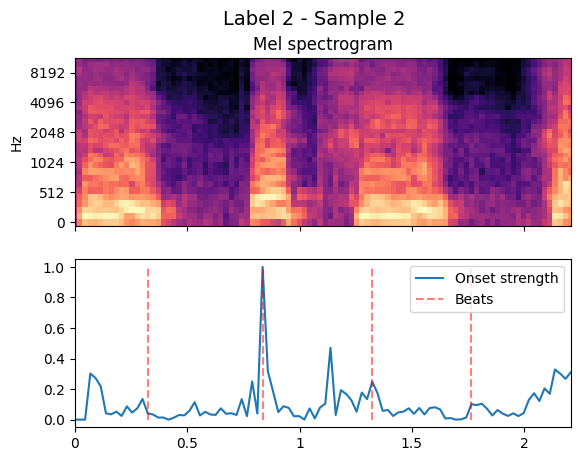

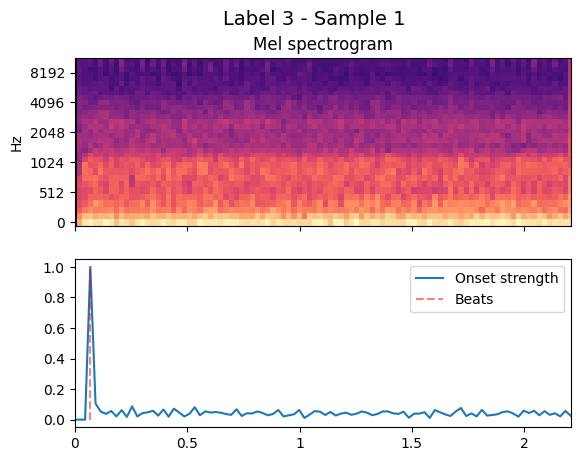

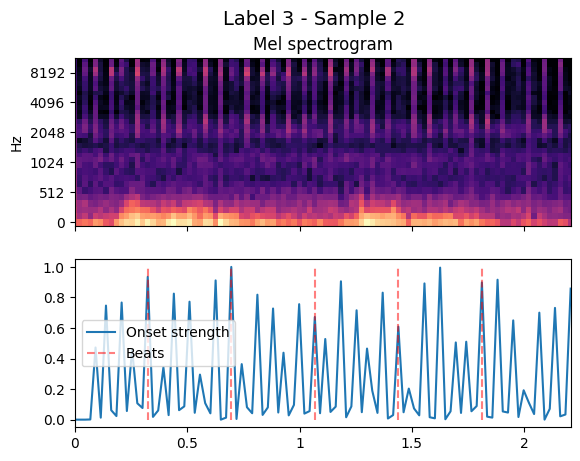

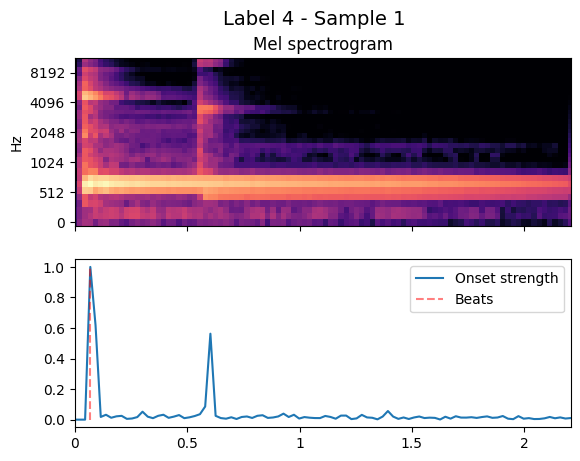

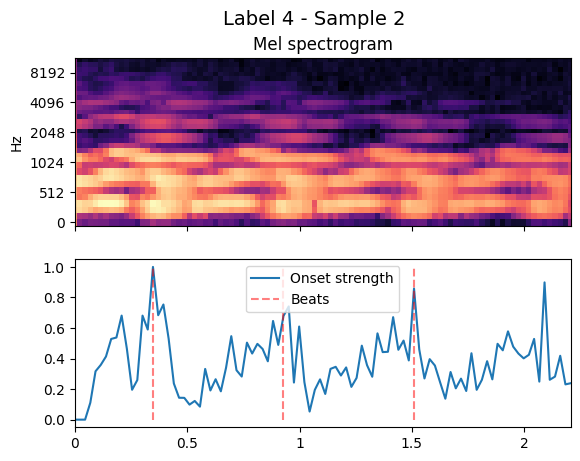

In [16]:
# Plot samples function
def plot_samples(data, label):
    sr = 22050
    hop_length = 512

    for i, sample in enumerate(data[14:16]):
        # Compute onset strength
        onset_env = librosa.onset.onset_strength(S=sample, sr=sr, hop_length=hop_length)

        # Extract beats
        tempo, beats = librosa.beat.beat_track(onset_envelope=onset_env, sr=sr)

        # Compute times for the onset strength array
        times = librosa.times_like(onset_env, sr=sr, hop_length=hop_length)

        # Plot Mel spectrogram and onset strength
        fig, ax = plt.subplots(nrows=2, sharex=True)
        fig.suptitle(f'Label {label} - Sample {i + 1}', fontsize=14)

        librosa.display.specshow(sample, sr=sr, hop_length=hop_length, x_axis='time', y_axis='mel', ax=ax[0])
        ax[0].set(title='Mel spectrogram')
        ax[0].label_outer()

        ax[1].plot(times, librosa.util.normalize(onset_env), label='Onset strength')
        ax[1].vlines(times[beats], 0, 1, alpha=0.5, color='r', linestyle='--', label='Beats')
        ax[1].legend()
        ax[1].label_outer()

        # Adjust x-axis limits
        ax[1].set_xlim(0, times[-1])

        plt.show()

# Plot samples for each label
plot_samples(label_0_data, 0)
plot_samples(label_1_data, 1)
plot_samples(label_2_data, 2)
plot_samples(label_3_data, 3)
plot_samples(label_4_data, 4)


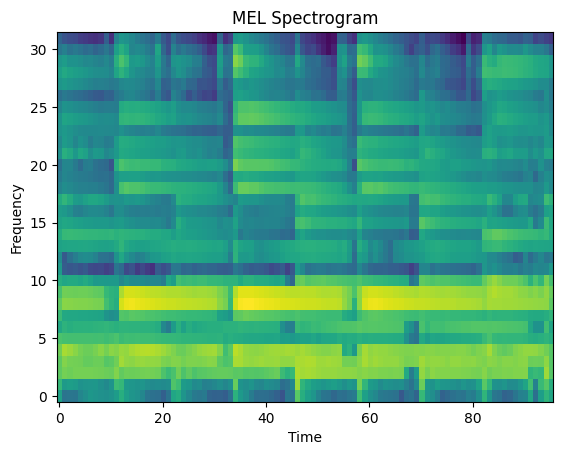

In [17]:
sample = training[0]
fig, ax = plt.subplots()

def plot_mel(mel, ax, title='MEL Spectrogram'):
    # visualize MEL spectrogram from training data sample with legend
    ax.imshow(mel, cmap='viridis', origin='lower', aspect='auto')
    ax.set(
        xlabel='Time',
        ylabel='Frequency',
        title=title,
    )
plot_mel(sample, ax)
plt.show()

# Augmentation

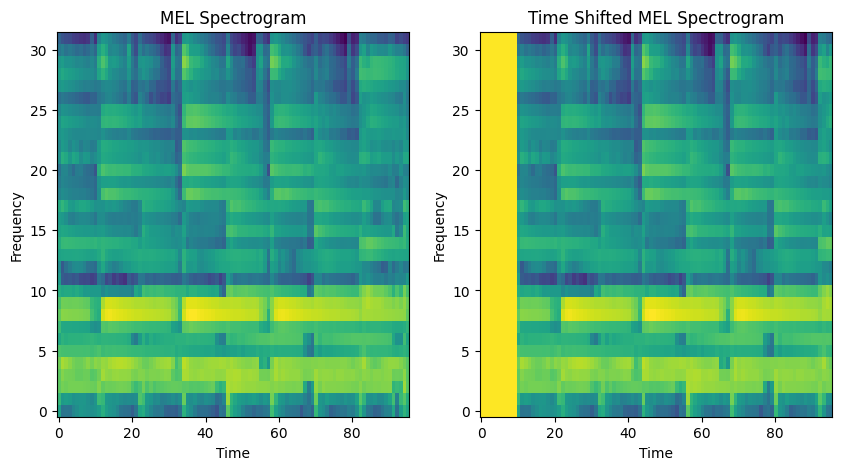

In [18]:
import augment

sample = training[0]

sample_time_shift = augment.time_shift(sample, shift_range=0.2)
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
plot_mel(sample, ax[0])
plot_mel(sample_time_shift, ax[1], title="Time Shifted MEL Spectrogram")
plt.show()


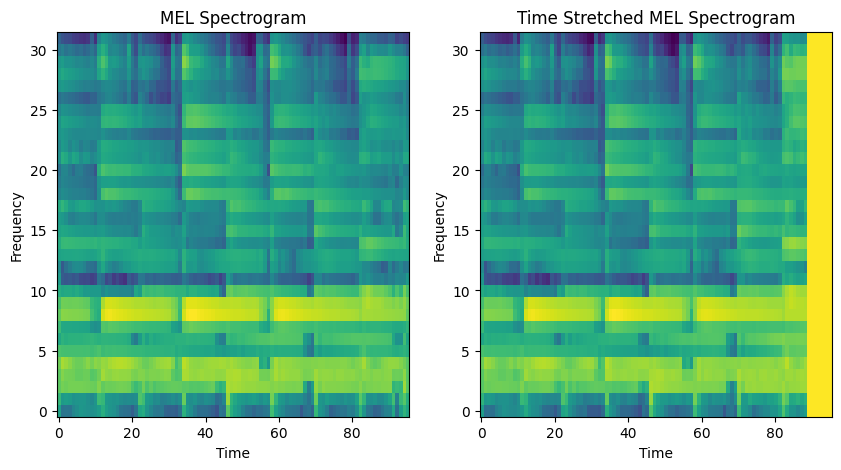

In [19]:
sample_time_stretch = augment.time_stretch(sample)
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
plot_mel(sample, ax[0])
plot_mel(sample_time_stretch, ax[1], title="Time Stretched MEL Spectrogram")
plt.show()

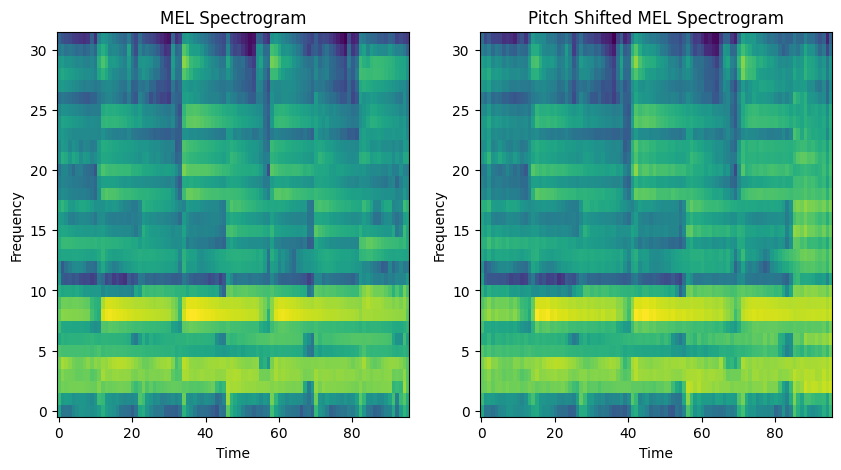

In [20]:
sample_pitch_shift = augment.pitch_shift(sample)
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
plot_mel(sample, ax[0])
plot_mel(sample_pitch_shift, ax[1], title="Pitch Shifted MEL Spectrogram")
plt.show()


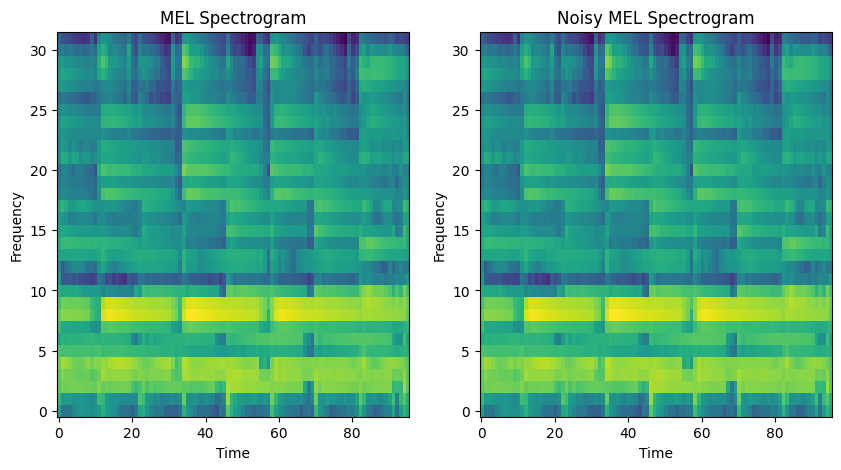

In [21]:
sample_noise = augment.add_noise(sample)
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
plot_mel(sample, ax[0])
plot_mel(sample_noise, ax[1], title="Noisy MEL Spectrogram")
plt.show()